In [0]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_in_drive = '/content/drive/My\ Drive/fast_ai/datasets/celeba-dataset.zip'

In [0]:
path = Config.data_path()


PosixPath('/root/.fastai/data')

In [0]:
! unzip -q -n {path_in_drive} -d {path}

In [0]:
! ls {path}

img_align_celeba      list_eval_partition.csv	       oxford-iiit-pet.tgz
list_attr_celeba.csv  list_landmarks_align_celeba.csv
list_bbox_celeba.csv  oxford-iiit-pet


In [0]:
path_color = path/'img_align_celeba/img_align_celeba'
path_gray = path/'img_gray'

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from PIL import Image, ImageDraw, ImageFont,ImageOps

class crappifier(object):
    def __init__(self, path_gray, path_color):
        self.path_gray = path_gray
        self.path_color = path_color              
        
    def __call__(self, fn, i):       
        dest = self.path_gray/fn.relative_to(self.path_color)    
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn)
        img = ImageOps.grayscale(img)
        img.save(dest)

In [0]:
il = ImageList.from_folder(path_color)

In [0]:
parallel(crappifier(path_gray, path_color), il.items)

In [0]:
bs,size = 24,160
arch = models.resnet34

In [0]:
arch = models.resnet34
src = ImageImageList.from_folder(path_gray).split_by_rand_pct(0.1, seed=42)

In [0]:
def get_data(bs, size):
  data = (src.label_from_func(lambda x: path_color/x.name)
  .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
  .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

  data.c=3
  return data

In [0]:
! ls {path}/'img_align_celeba/'

img_align_celeba


In [0]:
data_gen = get_data(bs, size)

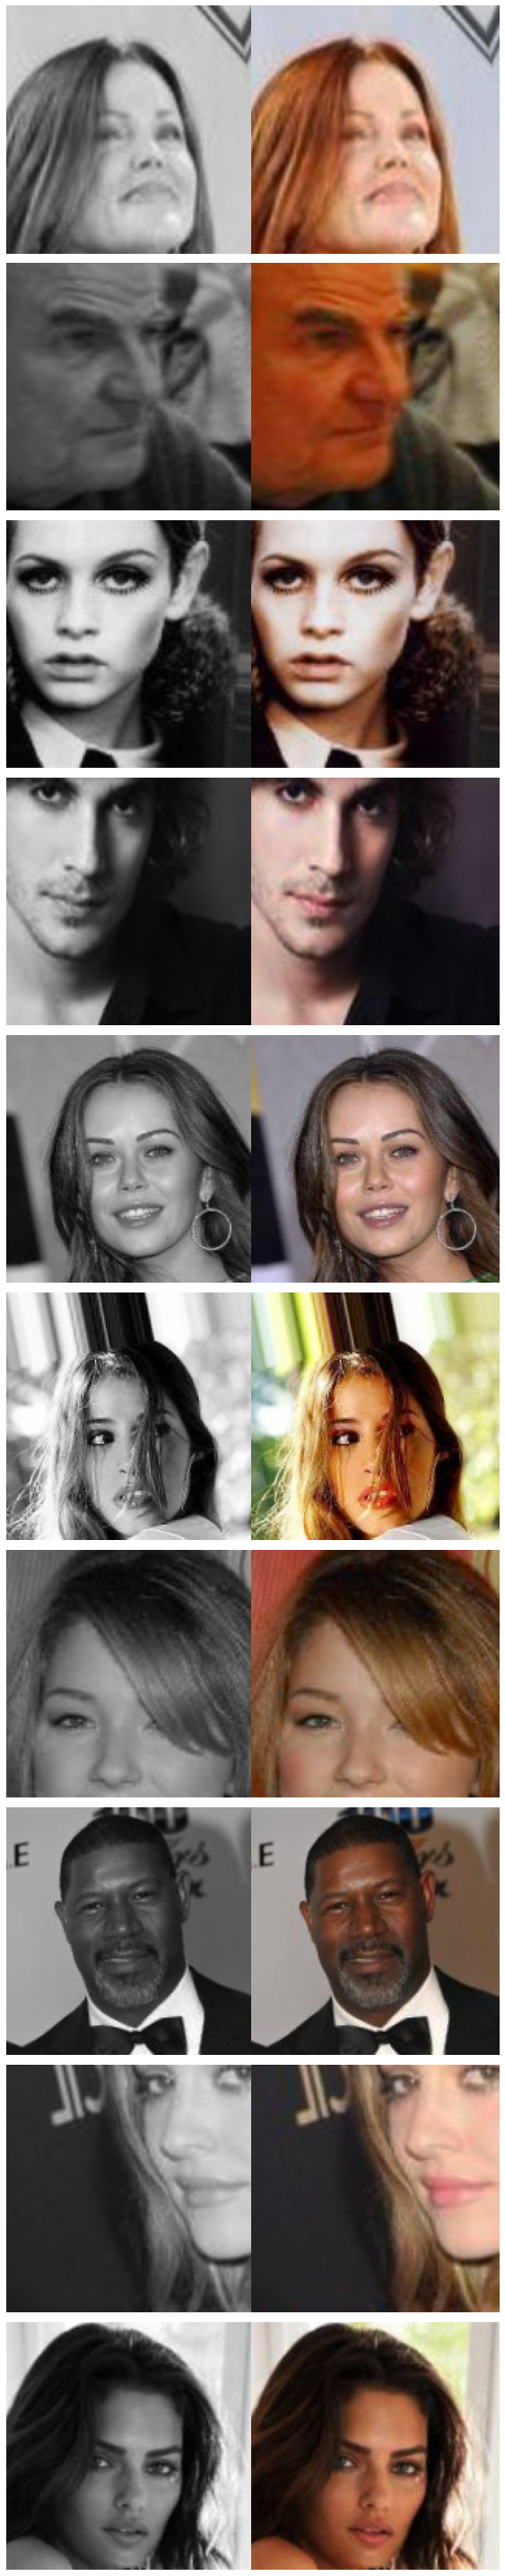

In [0]:
data_gen.show_batch(10)

In [0]:
wd = 1e-3

In [0]:
y_range = (-3., 3.)

In [0]:
loss_gen = MSELossFlat()

In [0]:
def create_gen_learner():
  return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

In [0]:
learn_gen = create_gen_learner()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn_gen.fit_one_cycle(2, pct_start=0.8)

epoch,train_loss,valid_loss,time
0,0.065084,0.075990,39:28
1,0.059283,0.070475,38:31


In [0]:
learn_gen.unfreeze()

In [0]:
learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

epoch,train_loss,valid_loss,time
0,0.061880,0.070803,38:21
1,0.061486,0.069498,38:24
2,0.061564,0.068724,38:15


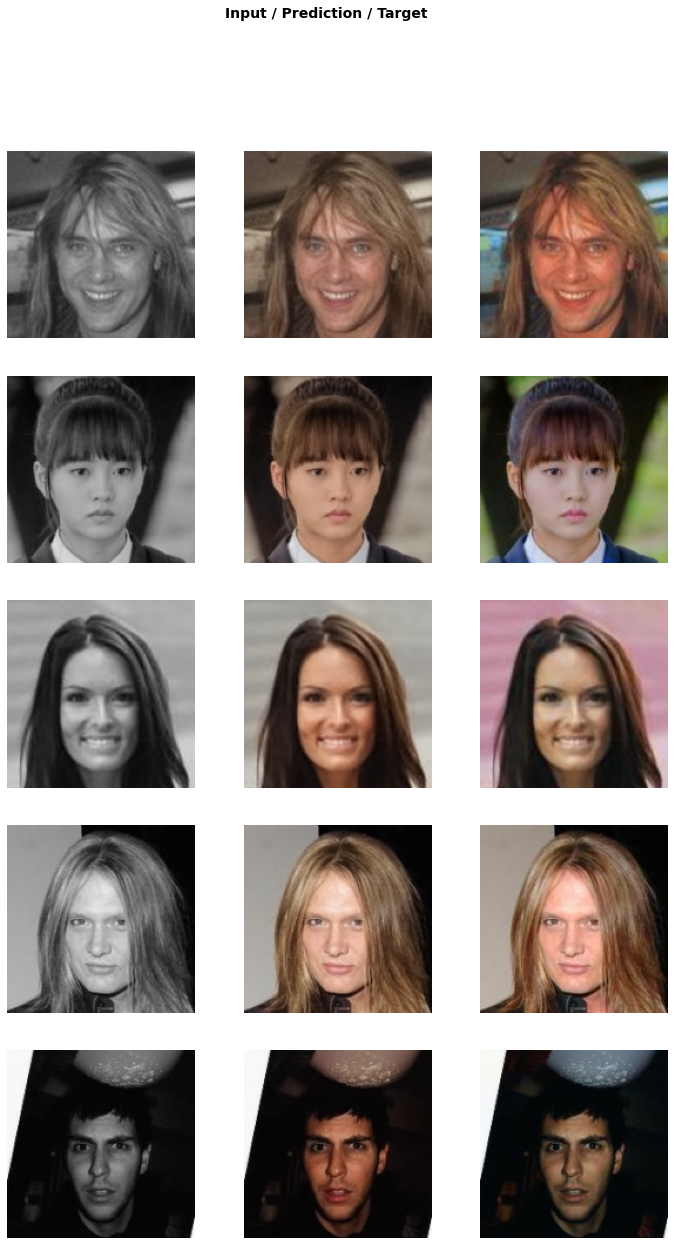

In [0]:
learn_gen.show_results(2)

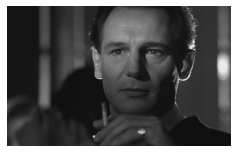

In [0]:
img = open_image('/content/oscarSchindle.jpg')
img.show(figsize=(4,4))

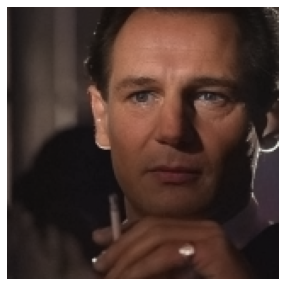

In [0]:
pred = learn_gen.predict(img)
show_image(pred[0], figsize=(5,5))

In [0]:
learn_gen.save('gen-pre2')

In [0]:
learn_gen.path

PosixPath('/root/.fastai/data/img_gray')

In [0]:
learn_gen.path = Path('/content')
learn_gen.path

PosixPath('/content')

In [0]:
learn_gen.save('gen-pre2')

In [0]:
learn_gen.export('grayscale-to-color.pkl')